#EP2.1 - Data augmentation

Integrantes:
- Carolene Bertoldi
- Felipe Varella
- Renato Nunes

Iniciação

In [1]:
from google.colab import drive 
import numpy as np
import cv2
import sys
del sys.modules['os']
import os
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib
import os
from skimage.color import rgb2gray
from skimage.io import imsave
import pprint
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

drive.mount('/content/gdrive')

# originalGrayDataset
path = "/content/gdrive/Shareddrives/Grupo Visão/EP1/dados"

# augmentedDataset
gray_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Gray"
log_folder = '/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Log_corrected'
gray_grad_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Gradiente_Cinza"
exponencial_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Exponencial"
mean_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Filtro_media_conv"


Mounted at /content/gdrive


#RGBtoGray
Nesse método as imagens coloridas são transformadas em níveis de cinza

In [ ]:
os.chdir(path)
RGB = os.listdir()


gray_array = []

for img in RGB:
  os.chdir(path)
  gray = image.imread(img)
  gray = rgb2gray(gray)
  gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
  os.chdir(gray_folder)
  imsave(img, gray)



#Criação da imagem RGBtoGray.jpg
Aqui é criada a matriz com as imagens em tons de cinza

In [2]:
os.chdir(gray_folder)

imgArray = []
#cv2.namedWindow('final', cv2.WINDOW_NORMAL)

for n in range(10):
    imgArray.append([])

#Cria o array com os arquivos de interesse para o mnist:

for file in os.listdir():
  if file[:2] != '10':
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[int(file[0:2]) - 1].append(file)
  else:
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[9].append(file)
  

#Transforma as imgagens de interesse em matrizes, as rotaciona quando necessário
# e diminui a resolução das matrizes:

for y in range(len(imgArray)):
    for x in range(len(imgArray[y])):
        im = cv2.imread(imgArray[y][x])
        if im.shape[1] != 3840:
            imgArray[y][x] = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
        else:
            imgArray[y][x] = im
        imgArray[y][x] = cv2.resize(imgArray[y][x], (384,216), interpolation=cv2.INTER_AREA)


#Concatena as matrizes horizontalmente:

rowArray = []
for vIndex in range(10):
    print(vIndex)
    img1 = imgArray[vIndex][0]
    if imgArray[vIndex]:
        for hIndex in range(1, len(imgArray[vIndex])):

            img2 = imgArray[vIndex][hIndex]
            horizontal = np.hstack((img1, img2))
            img1 = horizontal
        rowArray.append(horizontal)

#Concatena as matrizes verticalmente:

row1 = rowArray[0]
for row in rowArray[1:]:
    final = np.vstack((row1,row))
    row1 = final


#Define a pasta de destino, transforma a matriz em imagem novamente e salva:

os.chdir("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset")
cv2.imwrite('RGB2Gray.jpg', final )
print('Done!')

0
1
2
3
4
5
6
7
8
9
Done!


# Correção Logarítimica:

  Essa transformação mapeia uma faixa curta de valores com baixa intensidade para uma faixa longa de valores com alta intensidade

In [ ]:
os.chdir(gray_folder)
log_folder = '/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Log_corrected'

gray = os.listdir()

#img = image.imread(os.listdir()[0])
#logarithmic_corrected = exposure.adjust_log(img, 1)
#plt.imshow(logarithmic_corrected, cmap='gray');
#plt.imshow(img, cmap='gray');

for img in gray:
  os.chdir(gray_folder)
  log = exposure.adjust_log(image.imread(img),1)
  os.chdir(log_folder)
  imsave(img, log)

(2160, 3840)


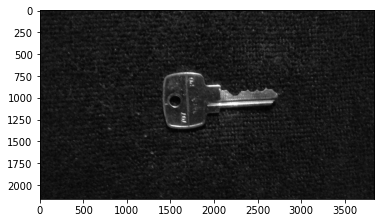

In [ ]:
os.chdir(gray_folder)

img = image.imread(os.listdir()[0])
logarithmic_corrected = exposure.adjust_log(img, 1)
plt.imshow(logarithmic_corrected, cmap='gray');
#plt.imshow(img, cmap='gray');
print(img.shape)

#Criação da imagem CorrecaoLogaritimica.jpg
Aqui é criada a matriz com as imagens com correção logarítimica

In [3]:
os.chdir(log_folder)

imgArray = []
#cv2.namedWindow('final', cv2.WINDOW_NORMAL)

for n in range(10):
    imgArray.append([])

#Cria o array com os arquivos de interesse para o mnist:

for file in os.listdir():
  if file[:2] != '10':
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[int(file[0:2]) - 1].append(file)
  else:
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[9].append(file)
  

#Transforma as imgagens de interesse em matrizes, as rotaciona quando necessário
# e diminui a resolução das matrizes:

for y in range(len(imgArray)):
    for x in range(len(imgArray[y])):
        im = cv2.imread(imgArray[y][x])
        if im.shape[1] != 3840:
            imgArray[y][x] = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
        else:
            imgArray[y][x] = im
        imgArray[y][x] = cv2.resize(imgArray[y][x], (384,216), interpolation=cv2.INTER_AREA)


#Concatena as matrizes horizontalmente:

rowArray = []
for vIndex in range(10):
    print(vIndex)
    img1 = imgArray[vIndex][0]
    if imgArray[vIndex]:
        for hIndex in range(1, len(imgArray[vIndex])):

            img2 = imgArray[vIndex][hIndex]
            horizontal = np.hstack((img1, img2))
            img1 = horizontal
        rowArray.append(horizontal)

#Concatena as matrizes verticalmente:

row1 = rowArray[0]
for row in rowArray[1:]:
    final = np.vstack((row1,row))
    row1 = final


#Define a pasta de destino, transforma a matriz em imagem novamente e salva:

os.chdir("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset")
cv2.imwrite('CorrecaoLogaritimica.jpg', final )
print('Done!')

0
1
2
3
4
5
6
7
8
9
Done!


# Soma de fundo com gradiente de nível de cinza
  O método consiste em adicionar uma matriz gradiente de cinza na imagem, dando a impressão de luminosidade

In [ ]:
os.chdir('/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Gray')

gradiente = np.linspace(0.001, 1, 3840)
matrix_grad = np.tile(gradiente, (2160,1))

gray = os.listdir()


for img in gray:
  os.chdir(gray_folder)
  grad = image.imread(img)
  gradiente = np.linspace(0.001, 1, grad.shape[1])
  matrix_grad = np.tile(gradiente, (grad.shape[0],1))
  grad = np.multiply(grad,matrix_grad)
  grad = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
  os.chdir(gray_grad_folder)
  imsave(img, grad)


#Criação da imagem GradienteCinza.jpg
Aqui é criada a matriz com as imagens com o gradiente cinza

In [4]:
os.chdir(gray_grad_folder)

imgArray = []
#cv2.namedWindow('final', cv2.WINDOW_NORMAL)

for n in range(10):
    imgArray.append([])

#Cria o array com os arquivos de interesse para o mnist:

for file in os.listdir():
  if file[:2] != '10':
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[int(file[0:2]) - 1].append(file)
  else:
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[9].append(file)
  

#Transforma as imgagens de interesse em matrizes, as rotaciona quando necessário
# e diminui a resolução das matrizes:

for y in range(len(imgArray)):
    for x in range(len(imgArray[y])):
        im = cv2.imread(imgArray[y][x])
        if im.shape[1] != 3840:
            imgArray[y][x] = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
        else:
            imgArray[y][x] = im
        imgArray[y][x] = cv2.resize(imgArray[y][x], (384,216), interpolation=cv2.INTER_AREA)


#Concatena as matrizes horizontalmente:

rowArray = []
for vIndex in range(10):
    print(vIndex)
    img1 = imgArray[vIndex][0]
    if imgArray[vIndex]:
        for hIndex in range(1, len(imgArray[vIndex])):

            img2 = imgArray[vIndex][hIndex]
            horizontal = np.hstack((img1, img2))
            img1 = horizontal
        rowArray.append(horizontal)

#Concatena as matrizes verticalmente:

row1 = rowArray[0]
for row in rowArray[1:]:
    final = np.vstack((row1,row))
    row1 = final


#Define a pasta de destino, transforma a matriz em imagem novamente e salva:

os.chdir("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset")
cv2.imwrite('GradienteCinza.jpg', final )
print('Done!')

0
1
2
3
4
5
6
7
8
9
Done!


# Correção exponencial
  Esse método transforma um conjunto curto de valores em um conjunto longo. Quando o expoente é maior que 1, a imagem resultante tende a escurecer, e quando é menor que 1, a tendência é clarear.

In [ ]:
os.chdir(gray_folder)
exponencial_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Exponencial"

gray = os.listdir()


for img in gray:
  os.chdir(gray_folder)
  gamma = exposure.adjust_gamma(image.imread(img),0.3)
  os.chdir(exponencial_folder)
  imsave(img, gamma)

#Criação da imagem CorrecaoExponencial.jpg
Aqui é criada a matriz com as imagens com correção exponencial

In [5]:
os.chdir(exponencial_folder)

imgArray = []
#cv2.namedWindow('final', cv2.WINDOW_NORMAL)

for n in range(10):
    imgArray.append([])

#Cria o array com os arquivos de interesse para o mnist:

for file in os.listdir():
  if file[:2] != '10':
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[int(file[0:2]) - 1].append(file)
  else:
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[9].append(file)
  

#Transforma as imgagens de interesse em matrizes, as rotaciona quando necessário
# e diminui a resolução das matrizes:

for y in range(len(imgArray)):
    for x in range(len(imgArray[y])):
        im = cv2.imread(imgArray[y][x])
        if im.shape[1] != 3840:
            imgArray[y][x] = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
        else:
            imgArray[y][x] = im
        imgArray[y][x] = cv2.resize(imgArray[y][x], (384,216), interpolation=cv2.INTER_AREA)


#Concatena as matrizes horizontalmente:

rowArray = []
for vIndex in range(10):
    print(vIndex)
    img1 = imgArray[vIndex][0]
    if imgArray[vIndex]:
        for hIndex in range(1, len(imgArray[vIndex])):

            img2 = imgArray[vIndex][hIndex]
            horizontal = np.hstack((img1, img2))
            img1 = horizontal
        rowArray.append(horizontal)

#Concatena as matrizes verticalmente:

row1 = rowArray[0]
for row in rowArray[1:]:
    final = np.vstack((row1,row))
    row1 = final


#Define a pasta de destino, transforma a matriz em imagem novamente e salva:

os.chdir("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset")
cv2.imwrite('CorrecaoExponencial.jpg', final )
print('Done!')

0
1
2
3
4
5
6
7
8
9
Done!


# Filtro da média
Nesse filtro o valor do pixel é substituído pela média dos pixels vizinhos, e com isso a imagem resultante apresenta um aspecto difuso

In [ ]:
os.chdir(gray_folder)
mean_folder = "/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset/Filtro_media_conv"

gray = os.listdir()

for img in gray:
  selem = disk(15)
  os.chdir(gray_folder)
  img_mean = rank.mean(np.array(image.imread(img)), selem=selem)
  os.chdir(mean_folder)
  imsave(img, img_mean)

#Criação da imagem FiltroMedia.jpg
Aqui é criada a matriz com as imagens após aplicação do filtro da média

In [6]:
os.chdir(mean_folder)

imgArray = []
#cv2.namedWindow('final', cv2.WINDOW_NORMAL)

for n in range(10):
    imgArray.append([])

#Cria o array com os arquivos de interesse para o mnist:

for file in os.listdir():
  if file[:2] != '10':
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[int(file[0:2]) - 1].append(file)
  else:
    if int(file[5]) <= 3 and int(file[6]) == 1:
      imgArray[9].append(file)
  

#Transforma as imgagens de interesse em matrizes, as rotaciona quando necessário
# e diminui a resolução das matrizes:

for y in range(len(imgArray)):
    for x in range(len(imgArray[y])):
        im = cv2.imread(imgArray[y][x])
        if im.shape[1] != 3840:
            imgArray[y][x] = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
        else:
            imgArray[y][x] = im
        imgArray[y][x] = cv2.resize(imgArray[y][x], (384,216), interpolation=cv2.INTER_AREA)


#Concatena as matrizes horizontalmente:

rowArray = []
for vIndex in range(10):
    print(vIndex)
    img1 = imgArray[vIndex][0]
    if imgArray[vIndex]:
        for hIndex in range(1, len(imgArray[vIndex])):

            img2 = imgArray[vIndex][hIndex]
            horizontal = np.hstack((img1, img2))
            img1 = horizontal
        rowArray.append(horizontal)

#Concatena as matrizes verticalmente:

row1 = rowArray[0]
for row in rowArray[1:]:
    final = np.vstack((row1,row))
    row1 = final


#Define a pasta de destino, transforma a matriz em imagem novamente e salva:

os.chdir("/content/gdrive/Shareddrives/Grupo Visão/EP2/Augmented_Dataset")
cv2.imwrite('FiltroMedia.jpg', final )
print('Done!')

0
1
2
3
4
5
6
7
8
9
Done!
